# 군집분석 (클러스터링) 통합 실습

## 군집분석이란?
- 결과를 안준다. 그냥 데이터만 가지고 분류를 하는데, 대강은 군집의 개수를 알려줘야 한다
- 비지도학습의 대표적인 방법 중 하나
- 군집의 개수를 모를 때는 엘보우 방법, 실루엣 방법, 전문가적 견해로 결정

## 가우시안 분포 (정규분포)
- `np.random.normal(평균, 표준편차, 형태)` - 평균과 표준편차를 만족하는 가우스분포를 따르는 데이터를 만들어낸다
- 예: `np.random.normal(173, 10, 100)`


생성된 데이터(앞 10개): [180.4507123  170.92603548 182.71532807 195.84544785 169.48769938
 169.48794565 196.68819223 184.51152094 165.95788421 181.13840065]
한글 폰트 설정 완료!


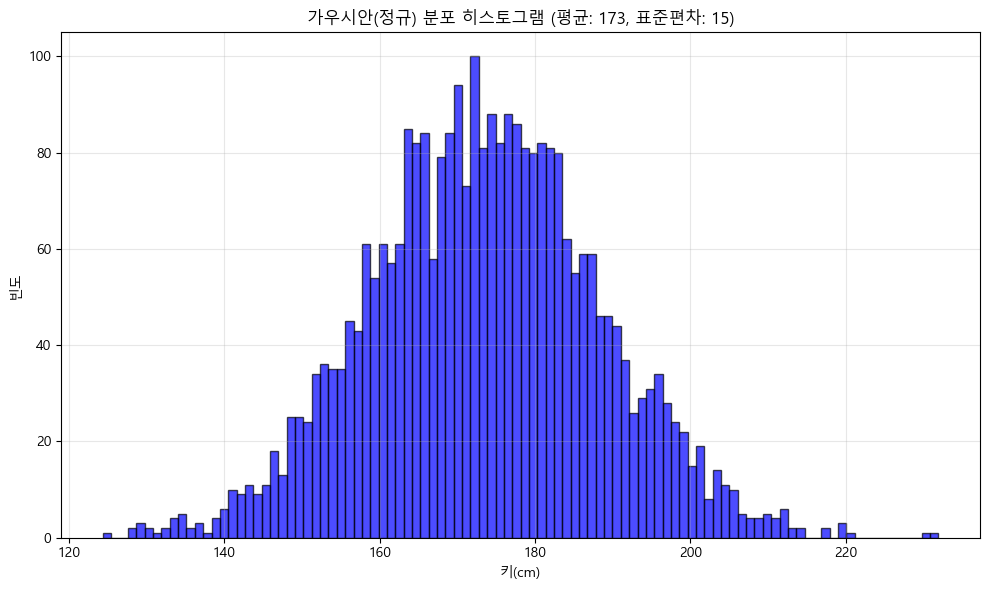

In [1]:
# 가우시안(정규) 분포 예제
import numpy as np
import matplotlib.pyplot as plt

# 시드 고정 (재현성 확보)
np.random.seed(42)

# 평균 173, 표준편차 15를 갖는 정규분포에서 3000개 샘플 생성
heights = np.random.normal(loc=173, scale=15, size=3000)
print("생성된 데이터(앞 10개):", heights[:10])

# 한글 폰트 설정 (노트북 상단에 추가)
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 윈도우 환경에서 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'  # 또는 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False  # 음수 표시 문제 해결

print("한글 폰트 설정 완료!")

# 히스토그램 시각화
plt.figure(figsize=(10, 6))
plt.hist(heights, bins=100, alpha=0.7, color='blue', edgecolor='black')
plt.title('가우시안(정규) 분포 히스토그램 (평균: 173, 표준편차: 15)')
plt.xlabel('키(cm)')
plt.ylabel('빈도')
plt.grid(True, alpha=0.3)
plt.tight_layout()  # 레이아웃 자동 조정
plt.show()

## 1. 인공 데이터로 군집분석 (3개 가우시안 분포)

서로 다른 위치에 있는 3개의 가우시안 분포에서 데이터를 생성하여 군집분석을 수행해보겠습니다.


In [2]:
from sklearn.cluster import KMeans

# 시드 고정으로 재현 가능한 결과
np.random.seed(42)

# 3개의 서로 다른 가우시안 분포에서 데이터 생성
x1 = np.random.normal(0, 1, (50, 2))    # 중심 (0,0), 표준편차 1, 50개 점
x2 = np.random.normal(5, 1, (50, 2))    # 중심 (5,5), 표준편차 1, 50개 점  
x3 = np.random.normal(2.5, 1, (50, 2))  # 중심 (2.5,2.5), 표준편차 1, 50개 점

# 데이터를 세로로 결합 (concatenate)
X = np.vstack((x1, x2, x3))  # 매개변수를 tuple로 전달
print(f"데이터 형태: {X.shape}")  # y없음, y를 모른다
print("첫 10개 데이터:")
print(X[:10])


데이터 형태: (150, 2)
첫 10개 데이터:
[[ 0.49671415 -0.1382643 ]
 [ 0.64768854  1.52302986]
 [-0.23415337 -0.23413696]
 [ 1.57921282  0.76743473]
 [-0.46947439  0.54256004]
 [-0.46341769 -0.46572975]
 [ 0.24196227 -1.91328024]
 [-1.72491783 -0.56228753]
 [-1.01283112  0.31424733]
 [-0.90802408 -1.4123037 ]]


In [3]:
# KMeans 클러스터링 적용
# n_clusters = 3: 몇 개가 묶였는지는 알려줘야 군집분석을 효율적으로 한다
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# 클러스터 레이블 예측
y_kmeans = kmeans.predict(X)
print("클러스터 레이블 (첫 20개):", y_kmeans[:20])

# 군집분석시 각 군집의 중심값을 가져온다
center = kmeans.cluster_centers_
print("군집 중심값:")
print(center)


클러스터 레이블 (첫 20개): [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
군집 중심값:
[[ 4.89896609  5.19447206]
 [-0.14754998 -0.04167172]
 [ 2.70342156  2.46624846]]


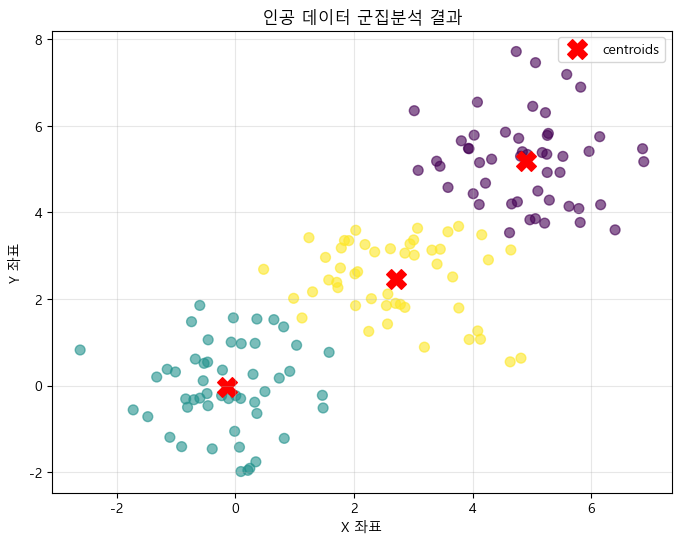

In [4]:
# 인공 데이터 군집분석 시각화
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', s=50, alpha=0.6)
plt.scatter(center[:, 0], center[:, 1], c='red', s=200, marker='X', label='centroids')
plt.title('인공 데이터 군집분석 결과')
plt.xlabel('X 좌표')
plt.ylabel('Y 좌표')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


## 2. 실제 데이터로 군집분석 (Iris 데이터셋)

이제 실제 데이터인 Iris 데이터셋을 사용하여 군집분석을 수행해보겠습니다.

### 군집 개수 설정의 중요성
- 원래 군집개수보다 적게 주면 그나마 차이가 덜한 군집끼리 합친다 → 정보손실, 해석도 어렵고
- 원래 군집개수보다 많게 주면 강제로 군집을 더 쪼갠다
- n_clusters를 모를 때는 엘보우 방법, 실루엣 방법, 전문가적 견해로 결정


In [5]:
from sklearn.datasets import load_iris

# Iris 데이터셋 로드
X_iris = load_iris()['data']
print(f"Iris 데이터 형태: {X_iris.shape}")  # y없음, y를 모른다
print("첫 10개 데이터:")
print(X_iris[:10])

# 5개 군집으로 설정 (실제 iris는 3개 클래스이지만 5개로 강제 분할)
kmeans_iris = KMeans(n_clusters=5, random_state=42)
kmeans_iris.fit(X_iris)

y_kmeans_iris = kmeans_iris.predict(X_iris)
print("클러스터 레이블 (첫 20개):", y_kmeans_iris[:20])

# 군집분석시 각 군집의 중심값을 가져온다
center_iris = kmeans_iris.cluster_centers_
print("군집 중심값:")
print(center_iris)


Iris 데이터 형태: (150, 4)
첫 10개 데이터:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
클러스터 레이블 (첫 20개): [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
군집 중심값:
[[6.24722222 2.84722222 4.775      1.575     ]
 [5.006      3.428      1.462      0.246     ]
 [5.53214286 2.63571429 3.96071429 1.22857143]
 [7.475      3.125      6.3        2.05      ]
 [6.52916667 3.05833333 5.50833333 2.1625    ]]


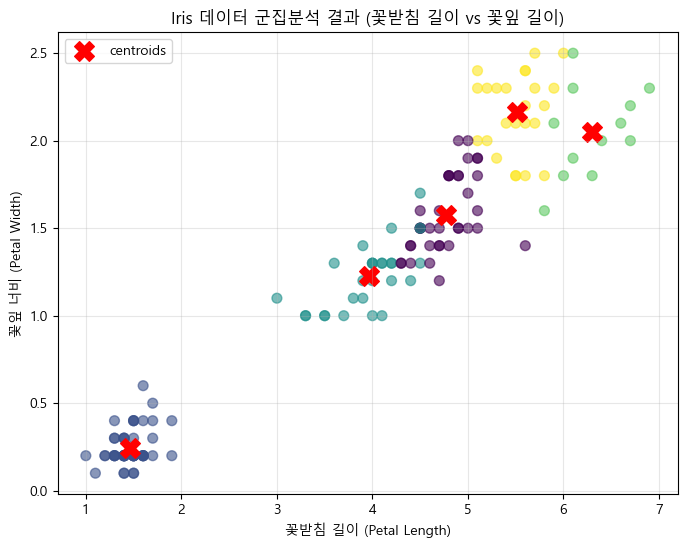

In [6]:
# Iris 데이터 군집분석 시각화 (꽃받침 길이 vs 꽃잎 길이)
plt.figure(figsize=(8, 6))
plt.scatter(X_iris[:, 2], X_iris[:, 3], c=y_kmeans_iris, cmap='viridis', s=50, alpha=0.6)
plt.scatter(center_iris[:, 2], center_iris[:, 3], c='red', s=200, marker='X', label='centroids')
plt.title('Iris 데이터 군집분석 결과 (꽃받침 길이 vs 꽃잎 길이)')
plt.xlabel('꽃받침 길이 (Petal Length)')
plt.ylabel('꽃잎 너비 (Petal Width)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## 결론

이 실습을 통해 군집분석의 기본 개념과 실제 적용 방법을 살펴보았습니다:

1. **인공 데이터 군집분석**: 3개의 가우시안 분포에서 생성된 데이터를 정확히 3개 군집으로 분류
2. **실제 데이터 군집분석**: Iris 데이터셋을 5개 군집으로 분류 (실제 클래스는 3개이지만 강제 분할)

### 주요 학습 내용
- KMeans 클러스터링의 기본 사용법
- 군집 개수 설정의 중요성
- 군집 중심점(centroid)의 의미
- 시각화를 통한 결과 해석

### 다음 단계
- 엘보우 방법을 사용한 최적 군집 개수 찾기
- 실루엣 분석을 통한 군집 품질 평가
- 다른 군집분석 알고리즘 (DBSCAN, 계층적 군집화 등) 시도
